In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
import seaborn as sns
import pickle
import warnings
warnings.filterwarnings('ignore')

In [3]:
data=pd.read_csv('https://raw.githubusercontent.com/dsrscientist/dataset3/main/Salaries.csv')
data.head(5)

,rank,discipline,yrs.since.phd,yrs.service,sex,salary
0,Prof,B,19,18,Male,139750
1,Prof,B,20,16,Male,173200
2,AsstProf,B,4,3,Male,79750
3,Prof,B,45,39,Male,115000
4,Prof,B,40,41,Male,141500


In [4]:
data.shape

(397, 6)

In [5]:
data.describe()

,yrs.since.phd,yrs.service,salary
count,397.000000,397.000000,397.000000
mean,22.314861,17.614610,113706.458438
std,12.887003,13.006024,30289.038695
min,1.000000,0.000000,57800.000000
25%,12.000000,7.000000,91000.000000
50%,21.000000,16.000000,107300.000000
75%,32.000000,27.000000,134185.000000
max,56.000000,60.000000,231545.000000


In [6]:
data.isnull().sum().sum()

0

<AxesSubplot:xlabel='salary', ylabel='Density'>

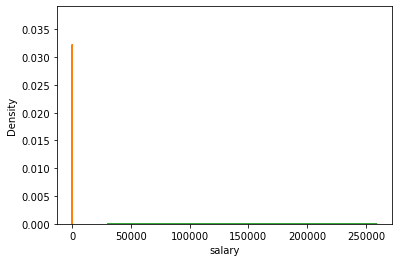

In [39]:
sns.distplot(data['yrs.since.phd'])
sns.distplot(data['yrs.service'])
sns.distplot(data['salary'])

In [8]:
x = data['yrs.service'].values
x

array([18, 16,  3, 39, 41,  6, 23, 45, 20, 18,  8,  2,  1,  0, 18,  3, 20,
       34, 23, 36, 26, 31, 30, 19,  8,  8, 23,  3,  0,  8,  4,  2,  9,  2,
        2,  0, 21,  4, 31,  9,  2, 23, 27, 38, 19, 15, 28, 19, 25,  1, 28,
       11,  3,  9, 11,  5, 21,  8,  9,  3,  8,  2, 31, 11,  3,  8, 12, 31,
       17, 36,  2, 45, 19, 34, 23,  3,  3, 19,  1,  2, 28, 16, 20,  2, 18,
       14, 37,  2, 25,  7,  5,  7,  7, 38, 20,  0, 12,  7, 14, 26, 25, 23,
        5, 14, 10, 28,  8,  8,  8, 31, 16, 16,  1, 37,  0,  9, 29, 36,  1,
        3, 14, 32, 22, 22, 22, 49, 26,  0, 30,  2,  9, 57,  8,  1, 25, 18,
       14, 14,  7, 18,  8, 10, 11,  3, 27, 28,  4, 27, 26,  3, 12,  4,  9,
       10,  0, 21, 18,  0,  6, 16,  2, 19,  7,  3,  0,  8, 16, 19,  6, 18,
        5, 19, 24, 20,  6, 25,  7,  9, 14,  3, 11,  5,  8, 22, 23, 30, 10,
       10, 28, 19,  9, 22, 18, 19, 53,  7,  4,  4, 33, 22,  4, 40, 17, 17,
        5,  2, 33, 18,  2, 20,  3, 39,  7, 19,  1, 11, 11, 22,  7, 11, 21,
       10,  6, 20, 35, 20

In [9]:
y = data['salary'].values
y

array([139750, 173200,  79750, 115000, 141500,  97000, 175000, 147765,
       119250, 129000, 119800,  79800,  77700,  78000, 104800, 117150,
       101000, 103450, 124750, 137000,  89565, 102580,  93904, 113068,
        74830, 106294, 134885,  82379,  77000, 118223, 132261,  79916,
       117256,  80225,  80225,  77000, 155750,  86373, 125196, 100938,
       146500,  93418, 101299, 231545,  94384, 114778,  98193, 151768,
       140096,  70768, 126621, 108875,  74692, 106639, 103760,  83900,
       117704,  90215, 100135,  75044,  90304,  75243, 109785, 103613,
        68404, 100522, 101000,  99418, 111512,  91412, 126320, 146856,
       100131,  92391, 113398,  73266, 150480, 193000,  86100,  84240,
       150743, 135585, 144640,  88825, 122960, 132825, 152708,  88400,
       172272, 107008,  97032, 105128, 105631, 166024, 123683,  84000,
        95611, 129676, 102235, 106689, 133217, 126933, 153303, 127512,
        83850, 113543,  82099,  82600,  81500, 131205, 112429,  82100,
      

In [10]:
x.shape

(397,)

In [11]:
y.shape

(397,)

In [12]:
xtrain,xtest,ytrain,ytest = train_test_split(x,y,train_size=0.75,random_state=100)

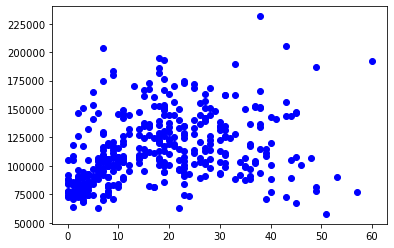

In [13]:
plt.scatter(x,y,color='blue')

In [16]:
df_visualizaton_nominal=data[['discipline','yrs.since.phd','yrs.service','salary']].copy()

In [17]:
df_visualizaton_nominal.columns

Index(['discipline', 'yrs.since.phd', 'yrs.service', 'salary'], dtype='object')

B    216
A    181
Name: discipline, dtype: int64


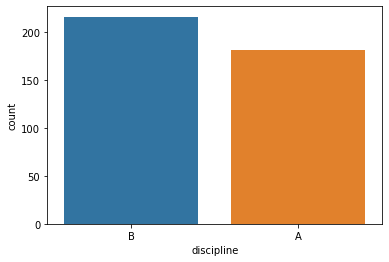

In [18]:
import seaborn as sns
ax=sns.countplot(x='discipline',data=df_visualizaton_nominal)
print(df_visualizaton_nominal['discipline'].value_counts())

<AxesSubplot:>

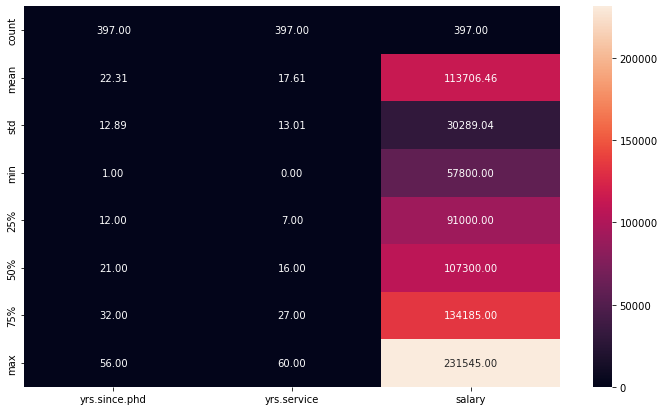

In [19]:
import matplotlib.pyplot as plt
plt.figure(figsize=(12,7))
sns.heatmap(df_visualizaton_nominal.describe(),annot=True,linecolor='black',fmt='0.2f')

In [20]:
df_visualizaton_nominal=data

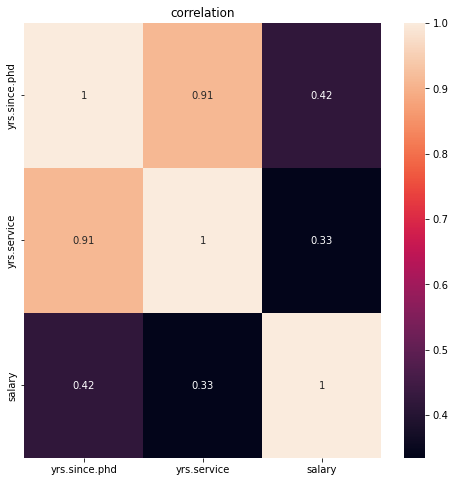

In [21]:
plt.figure(figsize=(8,8),facecolor='white')
sns.heatmap(data.corr(),annot=True)
plt.title('correlation')
plt.show()

<AxesSubplot:xlabel='discipline', ylabel='yrs.service'>

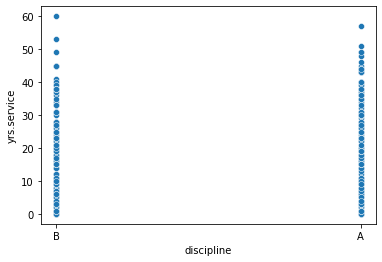

In [22]:
sns.scatterplot(x='discipline',y='yrs.service',data=data)

<AxesSubplot:xlabel='discipline', ylabel='yrs.since.phd'>

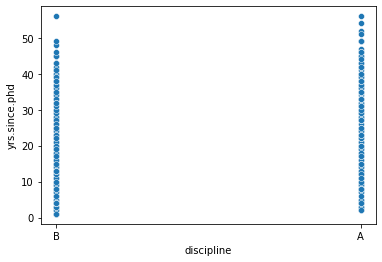

In [23]:
sns.scatterplot(x='discipline',y='yrs.since.phd',data=data)

<AxesSubplot:xlabel='discipline', ylabel='salary'>

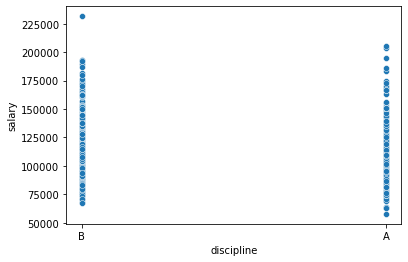

In [24]:
sns.scatterplot(x='discipline',y='salary',data=data)

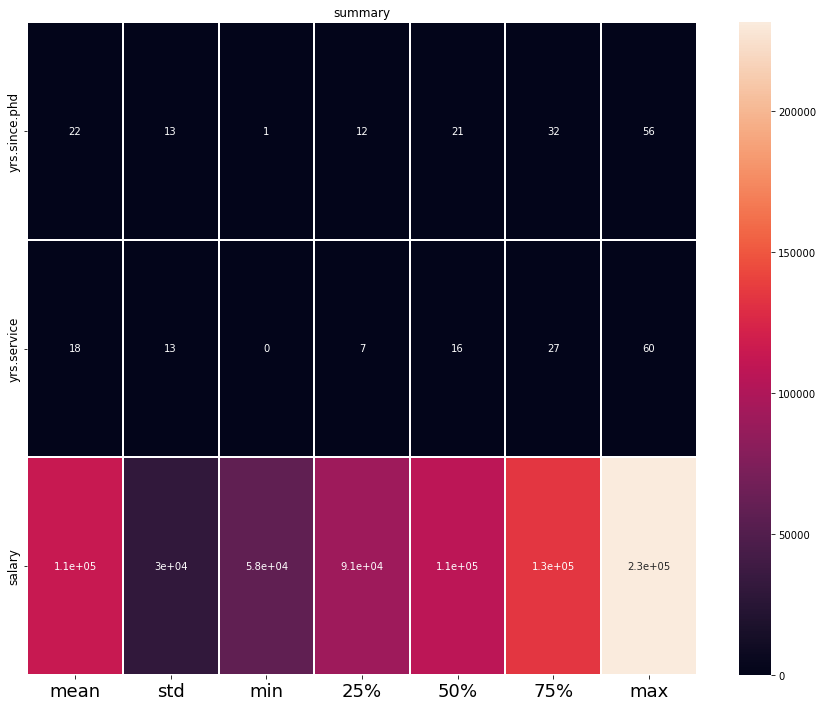

In [25]:
import matplotlib.pyplot as plt
import seaborn as sns
plt.figure(figsize=(15,12))
sns.heatmap(round(data.describe()[1:].transpose()),linewidth=2,annot=True)
plt.xticks(fontsize=18)
plt.yticks(fontsize=12)
plt.title('summary')
plt.savefig('heatmap.png')
plt.show()

In [26]:
data.corr()

,yrs.since.phd,yrs.service,salary
yrs.since.phd,1.000000,0.909649,0.419231
yrs.service,0.909649,1.000000,0.334745
salary,0.419231,0.334745,1.000000


In [27]:
data.describe()

,yrs.since.phd,yrs.service,salary
count,397.000000,397.000000,397.000000
mean,22.314861,17.614610,113706.458438
std,12.887003,13.006024,30289.038695
min,1.000000,0.000000,57800.000000
25%,12.000000,7.000000,91000.000000
50%,21.000000,16.000000,107300.000000
75%,32.000000,27.000000,134185.000000
max,56.000000,60.000000,231545.000000


In [28]:
collist=data.columns.values
ncol=40
nrows=15

In [29]:
collist

array(['rank', 'discipline', 'yrs.since.phd', 'yrs.service', 'sex',
       'salary'], dtype=object)

In [30]:
len(list(range(0,len(collist))))

6

In [31]:
for i in range(0,len(collist)):
    print(collist[i])
    break

rank


In [32]:
data.skew()

yrs.since.phd    0.300880
yrs.service      0.650569
salary           0.714568
dtype: float64

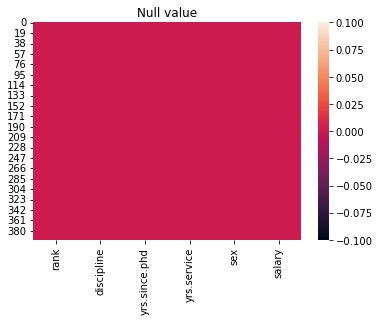

In [33]:
sns.heatmap(data.isnull())
plt.title('Null value')
plt.show()

In [34]:
type(data.columns)

pandas.core.indexes.base.Index

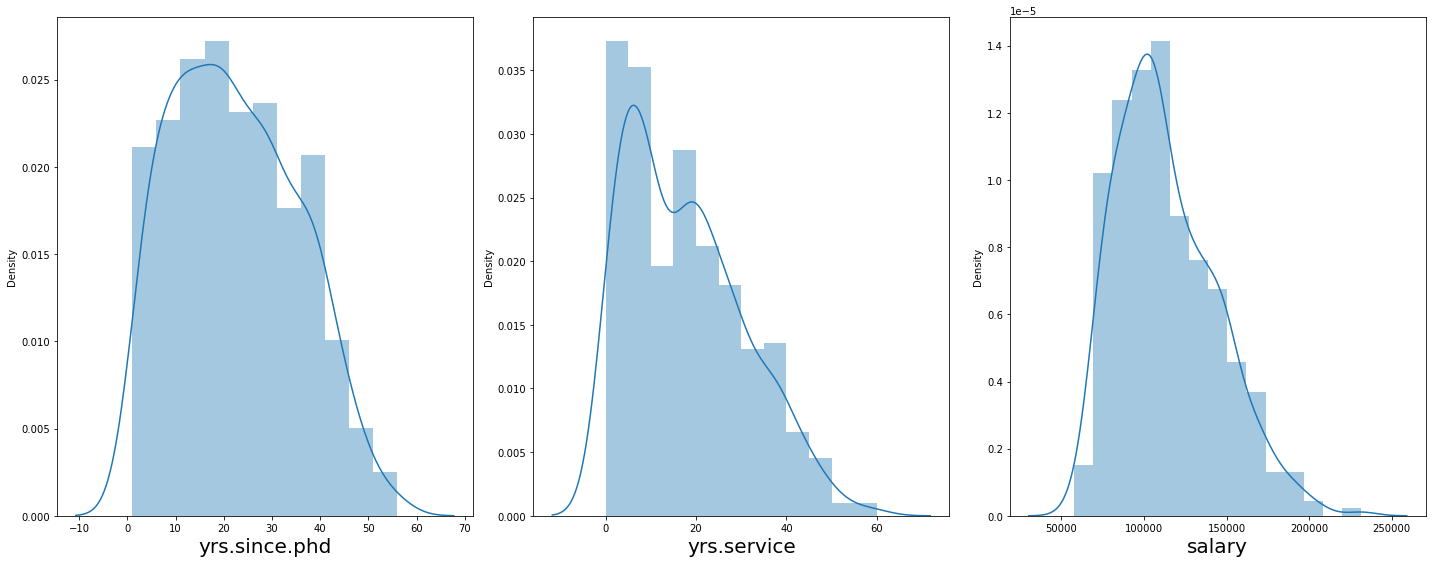

In [40]:
plt.figure(figsize=(20,15))
plotnumber = 1

for column in data[['yrs.since.phd','yrs.service','salary']]:
    if plotnumber<=6:
        ax = plt.subplot(2,3,plotnumber)
        sns.distplot(data[column])
        plt.xlabel(column,fontsize=20)
          
    plotnumber+=1
plt.tight_layout()

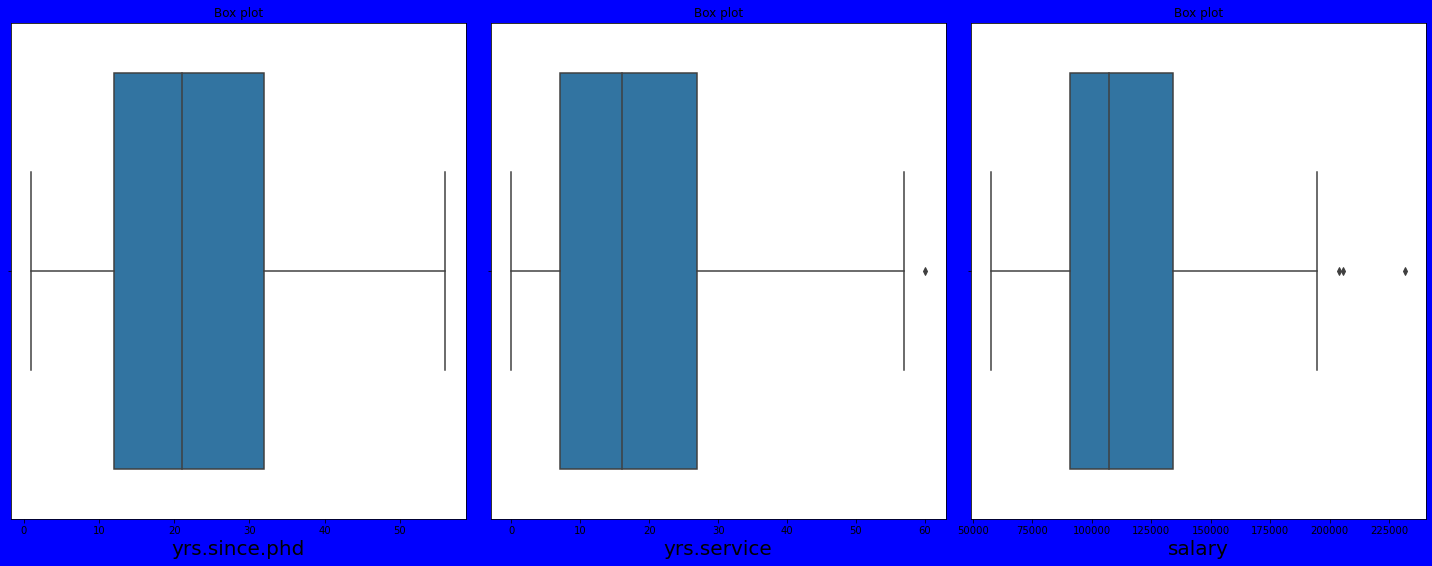

In [41]:
plt.figure(figsize=(20,15),facecolor='blue')
plotnumber = 1

for column in data[['yrs.since.phd','yrs.service','salary']]:
    if plotnumber<=6:
        ax = plt.subplot(2,3,plotnumber)
        sns.boxplot(data[column])
        plt.xlabel(column,fontsize=20)
        plt.title('Box plot')
          
    plotnumber+=1
plt.tight_layout()

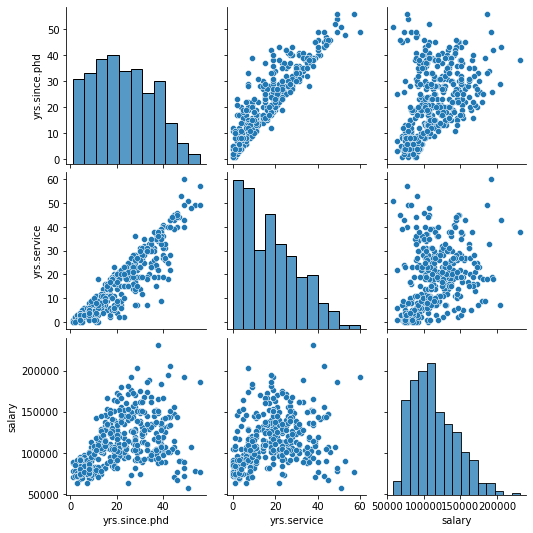

In [42]:
sns.pairplot(data)
plt.savefig('pairplot.png')
plt.show()

In [43]:
data.corr()

,yrs.since.phd,yrs.service,salary
yrs.since.phd,1.000000,0.909649,0.419231
yrs.service,0.909649,1.000000,0.334745
salary,0.419231,0.334745,1.000000


In [46]:
data.corr()['salary'].sort_values()

yrs.service      0.334745
yrs.since.phd    0.419231
salary           1.000000
Name: salary, dtype: float64

<AxesSubplot:>

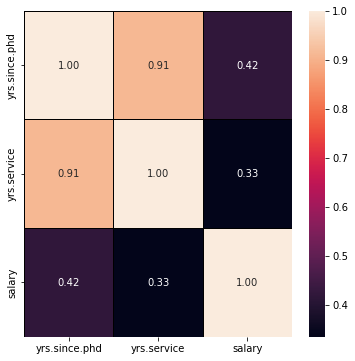

In [50]:
plt.figure(figsize=(6,6))
sns.heatmap(data.corr(),annot=True,linewidth=0.5,linecolor='black',fmt='.2f')

In [51]:
data.describe()

,yrs.since.phd,yrs.service,salary
count,397.000000,397.000000,397.000000
mean,22.314861,17.614610,113706.458438
std,12.887003,13.006024,30289.038695
min,1.000000,0.000000,57800.000000
25%,12.000000,7.000000,91000.000000
50%,21.000000,16.000000,107300.000000
75%,32.000000,27.000000,134185.000000
max,56.000000,60.000000,231545.000000


In [52]:
len(list(range(0,len(collist))))

6

In [53]:
range(0,len(collist))

range(0, 6)

In [54]:
data.skew()

yrs.since.phd    0.300880
yrs.service      0.650569
salary           0.714568
dtype: float64

In [55]:
from scipy.stats import zscore

In [56]:
zscore(data.corr())

,yrs.since.phd,yrs.service,salary
yrs.since.phd,0.876726,0.548212,-0.559426
yrs.service,0.522633,0.854875,-0.845134
salary,-1.399359,-1.403087,1.404561


In [57]:
np.abs(2)

2

In [58]:
z=np.abs(zscore(data.corr()))

In [59]:
type(z)

pandas.core.frame.DataFrame

In [60]:
np.where(z>1)

(array([2, 2, 2], dtype=int64), array([0, 1, 2], dtype=int64))

In [61]:
z.iloc[2]

yrs.since.phd    1.399359
yrs.service      1.403087
salary           1.404561
Name: salary, dtype: float64

In [62]:
len(np.where(z>1)[0])

3

In [63]:
data.corr().shape

(3, 3)

In [64]:
data1=data.corr()[(z<1).all(axis=1)]

In [65]:
print('total dropped',data.corr().shape[0]-data1.shape[0])

total dropped 1


In [66]:
loss_percentage=(3-2)/3*100
print(loss_percentage,'%')

33.33333333333333 %


In [67]:
x=data1.iloc[:,:-1]
y=data1.iloc[:,-1]

In [68]:
from sklearn.preprocessing import power_transform
x=power_transform(x,method='yeo-johnson')

In [69]:
type(x)

numpy.ndarray

In [70]:
x

array([[ 1., -1.],
       [-1.,  1.]])

In [71]:
x.ndim

2

In [73]:
sc=StandardScaler()
x=sc.fit_transform(x)
x

array([[ 1., -1.],
       [-1.,  1.]])

In [74]:
x.mean()

0.0

In [75]:
x.std()

1.0

In [76]:
data.salary.unique()

array([139750, 173200,  79750, 115000, 141500,  97000, 175000, 147765,
       119250, 129000, 119800,  79800,  77700,  78000, 104800, 117150,
       101000, 103450, 124750, 137000,  89565, 102580,  93904, 113068,
        74830, 106294, 134885,  82379,  77000, 118223, 132261,  79916,
       117256,  80225, 155750,  86373, 125196, 100938, 146500,  93418,
       101299, 231545,  94384, 114778,  98193, 151768, 140096,  70768,
       126621, 108875,  74692, 106639, 103760,  83900, 117704,  90215,
       100135,  75044,  90304,  75243, 109785, 103613,  68404, 100522,
        99418, 111512,  91412, 126320, 146856, 100131,  92391, 113398,
        73266, 150480, 193000,  86100,  84240, 150743, 135585, 144640,
        88825, 122960, 132825, 152708,  88400, 172272, 107008,  97032,
       105128, 105631, 166024, 123683,  84000,  95611, 129676, 102235,
       106689, 133217, 126933, 153303, 127512,  83850, 113543,  82099,
        82600,  81500, 131205, 112429,  82100,  72500, 104279, 105000,
      

In [77]:
data.salary.value_counts()

92000     5
72500     4
74000     4
105000    3
101000    3
         ..
76840     1
83001     1
113278    1
155500    1
81035     1
Name: salary, Length: 371, dtype: int64

In [78]:
from sklearn.linear_model import LogisticRegression
lr=LogisticRegression()
from sklearn.metrics import accuracy_score
from sklearn.decomposition import PCA

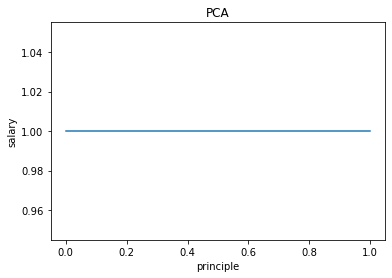

In [79]:
x=data1.drop('salary',axis=1)
scaler=StandardScaler()
x_scaled=scaler.fit_transform(x)
pca=PCA()
pca.fit_transform(x_scaled)
plt.figure()
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('principle')
plt.ylabel('salary')
plt.title('PCA')
plt.show()

In [81]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x_scaled,y,random_state=20,test_size=0.25)

In [82]:
from sklearn.linear_model import LinearRegression
lr=LinearRegression()
lr.fit(x_train,y_train)

LinearRegression()

In [83]:
y_pre=lr.predict(x_test)
df=pd.DataFrame({'actual':y_test,'predict':y_pre})

In [84]:
df.head(5)

,actual,predict
yrs.since.phd,0.419231,0.334745


In [85]:
x_train,x_test,y_train,y_test = train_test_split(x,y,random_state=20,test_size=0.25)

In [90]:
y_pre

array([0.33474468])